In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
from matplotlib.ticker import ScalarFormatter
import numpy as np
import datetime
import seaborn as sns

In [2]:
filename=(datetime.datetime.today()-datetime.timedelta(days=0)).strftime("Case data/covid19_case_summary_%Y-%m-%d.csv")

df = pd.read_csv(filename)                                          #Load CSV
df=df.pivot_table(index=['attribute','metric'],columns='description',values='value')  #Reshape the data

In [3]:
df2=pd.DataFrame(data=df['Cases of COVID-19 Reported in Colorado by Age Group, Hospitalization, and Outcome'].dropna().xs('Cases', axis=0, level=1, drop_level=True)).reset_index()
df2[['age','status']]=df2['attribute'].str.split(', ',expand=True)
df2['Date']=datetime.datetime.today()-datetime.timedelta(days=0)
CovidByAge=df2.pivot_table(index=['Date'],columns='age',values='Cases of COVID-19 Reported in Colorado by Age Group, Hospitalization, and Outcome',aggfunc=np.sum)

In [4]:
for i in range(1,76):
    filename=(datetime.datetime.today()-datetime.timedelta(days=i)).strftime("Case data/covid19_case_summary_%Y-%m-%d.csv")

    df = pd.read_csv(filename)                                          #Load CSV
    df=df.pivot_table(index=['attribute','metric'],columns='description',values='value')  #Reshape the data
    df2=pd.DataFrame(data=df['Cases of COVID-19 Reported in Colorado by Age Group, Hospitalization, and Outcome'].dropna().xs('Cases', axis=0, level=1, drop_level=True)).reset_index()
    df2[['age','status']]=df2['attribute'].str.split(', ',expand=True)
    df2['Date']=datetime.datetime.today()-datetime.timedelta(days=i)
    CovidByAge=CovidByAge.append(df2.pivot_table(index=['Date'],columns='age',values='Cases of COVID-19 Reported in Colorado by Age Group, Hospitalization, and Outcome',aggfunc=np.sum),ignore_index = False)
    
for i in range(77,107):
    filename=(datetime.datetime.today()-datetime.timedelta(days=i)).strftime("Case data/covid19_case_summary_%Y-%m-%d.csv")

    df = pd.read_csv(filename)                                          #Load CSV
    df=df.pivot_table(index=['attribute','metric'],columns='description',values='value')  #Reshape the data
    df2=pd.DataFrame(data=df['Case Counts by Age Group, Hospitalizations, and Deaths'].dropna().xs('Cases', axis=0, level=1, drop_level=True)).reset_index()
    df2[['age','status']]=df2['attribute'].str.split(', ',expand=True)
    df2['Date']=datetime.datetime.today()-datetime.timedelta(days=i)
    CovidByAge=CovidByAge.append(df2.pivot_table(index=['Date'],columns='age',values='Case Counts by Age Group, Hospitalizations, and Deaths',aggfunc=np.sum),ignore_index = False)
for i in range(108,113):
    filename=(datetime.datetime.today()-datetime.timedelta(days=i)).strftime("Case data/covid19_case_summary_%Y-%m-%d.csv")

    df = pd.read_csv(filename)                                          #Load CSV
    df=df.pivot_table(index=['attribute','metric'],columns='description',values='value')  #Reshape the data
    df2=pd.DataFrame(data=df['Case Counts by Age Group'].dropna().xs('Cases', axis=0, level=1, drop_level=True)).reset_index()
    df2['age']=df2['attribute']
    df2['Date']=datetime.datetime.today()-datetime.timedelta(days=i)
    CovidByAge=CovidByAge.append(df2.pivot_table(index=['Date'],columns='age',values='Case Counts by Age Group',aggfunc=np.sum),ignore_index = False)
    


In [5]:
CovidByAge=CovidByAge.sort_index()

In [6]:

CovidByAge['d0-9'] = CovidByAge['0-9']-CovidByAge['0-9'].shift(1)
CovidByAge['7Day0'] = CovidByAge['d0-9'].iloc[:].rolling(window=7).mean()
CovidByAge['d10-19'] = CovidByAge['10-19']-CovidByAge['10-19'].shift(1)
CovidByAge['7Day10'] = CovidByAge['d10-19'].iloc[:].rolling(window=7).mean()
CovidByAge['d20-29'] = CovidByAge['20-29']-CovidByAge['20-29'].shift(1)
CovidByAge['7Day20'] = CovidByAge['d20-29'].iloc[:].rolling(window=7).mean()
CovidByAge['d30-39'] = CovidByAge['30-39']-CovidByAge['30-39'].shift(1)
CovidByAge['7Day30'] = CovidByAge['d30-39'].iloc[:].rolling(window=7).mean()
CovidByAge['d40-49'] = CovidByAge['40-49']-CovidByAge['40-49'].shift(1)
CovidByAge['7Day40'] = CovidByAge['d40-49'].iloc[:].rolling(window=7).mean()
CovidByAge['d50-59'] = CovidByAge['50-59']-CovidByAge['50-59'].shift(1)
CovidByAge['7Day50'] = CovidByAge['d50-59'].iloc[:].rolling(window=7).mean()
CovidByAge['d60-69'] = CovidByAge['60-69']-CovidByAge['60-69'].shift(1)
CovidByAge['7Day60'] = CovidByAge['d60-69'].iloc[:].rolling(window=7).mean()
CovidByAge['d70-79'] = CovidByAge['70-79']-CovidByAge['70-79'].shift(1)
CovidByAge['7Day70'] = CovidByAge['d70-79'].iloc[:].rolling(window=7).mean()
CovidByAge['d80+'] = CovidByAge['80+']-CovidByAge['80+'].shift(1)
CovidByAge['7Day80'] = CovidByAge['d80+'].iloc[:].rolling(window=7).mean()

CovidByAge['7DayTotal'] = CovidByAge['7Day80']+CovidByAge['7Day70']+CovidByAge['7Day60']+ CovidByAge['7Day50']+CovidByAge['7Day40']+CovidByAge['7Day30']+CovidByAge['7Day20']+CovidByAge['7Day10']+CovidByAge['7Day0']
CovidByAge['Perc0']=np.array(CovidByAge['7Day0'], dtype=np.float32)/np.array(CovidByAge['7DayTotal'], dtype=np.float32)*100
CovidByAge['Perc10']=np.array(CovidByAge['7Day10'], dtype=np.float32)/np.array(CovidByAge['7DayTotal'], dtype=np.float32)*100
CovidByAge['Perc20']=np.array(CovidByAge['7Day20'], dtype=np.float32)/np.array(CovidByAge['7DayTotal'], dtype=np.float32)*100
CovidByAge['Perc30']=np.array(CovidByAge['7Day30'], dtype=np.float32)/np.array(CovidByAge['7DayTotal'], dtype=np.float32)*100
CovidByAge['Perc40']=np.array(CovidByAge['7Day40'], dtype=np.float32)/np.array(CovidByAge['7DayTotal'], dtype=np.float32)*100
CovidByAge['Perc50']=np.array(CovidByAge['7Day50'], dtype=np.float32)/np.array(CovidByAge['7DayTotal'], dtype=np.float32)*100
CovidByAge['Perc60']=np.array(CovidByAge['7Day60'], dtype=np.float32)/np.array(CovidByAge['7DayTotal'], dtype=np.float32)*100
CovidByAge['Perc70']=np.array(CovidByAge['7Day70'], dtype=np.float32)/np.array(CovidByAge['7DayTotal'], dtype=np.float32)*100
CovidByAge['Perc80']=np.array(CovidByAge['7Day80'], dtype=np.float32)/np.array(CovidByAge['7DayTotal'], dtype=np.float32)*100







CovidByAge[CovidByAge < 0] = 0
CovidByAge.head(30)

age,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80+,Unknown,...,7DayTotal,Perc0,Perc10,Perc20,Perc30,Perc40,Perc50,Perc60,Perc70,Perc80
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-17 18:31:53.848193,2.0,7.0,20.0,39.0,35.0,33.0,23.0,15.0,6.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-18 18:31:53.820265,1.0,9.0,27.0,40.0,41.0,40.0,29.0,18.0,7.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-19 18:31:53.795329,2.0,12.0,37.0,49.0,53.0,50.0,41.0,25.0,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-20 18:31:53.768407,3.0,15.0,53.0,66.0,62.0,64.0,52.0,37.0,11.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-21 18:31:53.742829,3.0,15.0,65.0,84.0,95.0,79.0,66.0,46.0,20.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-23 18:31:53.718579,5.0,18.0,101.0,123.0,145.0,114.0,98.0,80.0,33.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-24 18:31:53.692648,11.0,23.0,122.0,157.0,175.0,148.0,127.0,97.0,48.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-25 18:31:53.665720,15.0,26.0,151.0,187.0,204.0,180.0,148.0,113.0,58.0,4.0,...,128.857143,1.441242,2.106430,14.523281,16.407982,18.736141,16.297117,13.858093,10.864744,5.764966
2020-03-26 18:31:53.639793,19.0,38.0,202.0,247.0,247.0,245.0,201.0,145.0,81.0,5.0,...,173.285714,1.483924,2.390767,14.427040,17.065126,16.982687,16.900248,14.179718,10.469909,6.100577


C:\Users\Soltys\anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


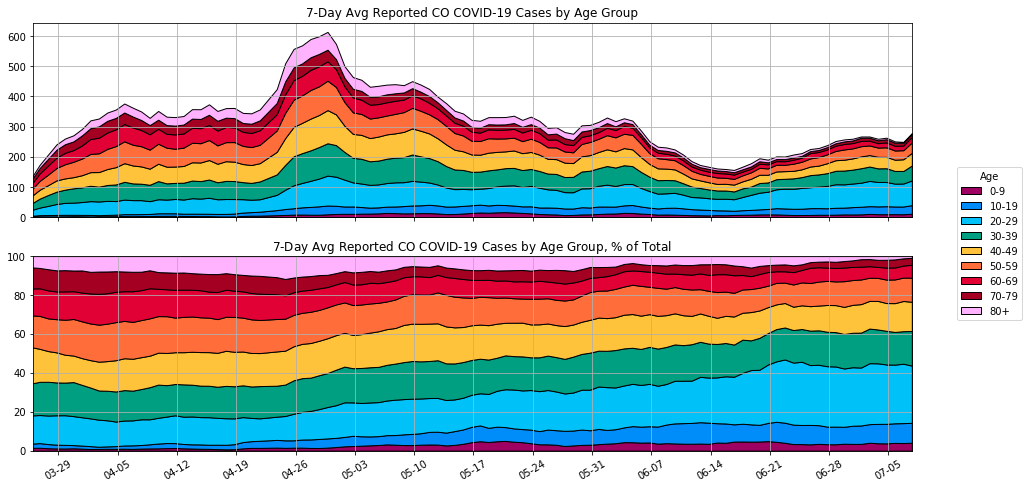

In [7]:
plt.rcParams['figure.figsize'] = [40/2.54, 20/2.54]
fig, axs = plt.subplots(nrows=2, ncols=1, facecolor='white')

dates=CovidByAge.reset_index()['Date'].values
N=len(CovidByAge)

pal = ["#9F0162","#008DF9","#00C2F9","#009F81","#FFC33B", "#FF6E3A", "#E20134", "#A40122","#FFB2FD"]
axs[0].stackplot(CovidByAge.index,CovidByAge[['7Day0','7Day10','7Day20','7Day30','7Day40','7Day50','7Day60','7Day70','7Day80']].values.T,
             colors=pal,edgecolor='k')
#CovidByAge.plot.area(ax=axs[0],y=['7Day0','7Day10','7Day20','7Day30','7Day40','7Day50','7Day60','7Day70','7Day80'],
#                     label=['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80+'],
#                     colormap="plasma", alpha=1)
axs[1].stackplot(CovidByAge.index,CovidByAge[['Perc0','Perc10','Perc20','Perc30','Perc40','Perc50','Perc60','Perc70','Perc80']].values.T,
             colors=pal,edgecolor='k')
#CovidByAge.plot.area(ax=axs[1],y=['Perc0','Perc10','Perc20','Perc30','Perc40','Perc50','Perc60','Perc70','Perc80'],
#                     label=['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80+'])

formatter = mdates.DateFormatter("%m-%d")
locator=mdates.WeekdayLocator(byweekday=SU)

for i in range(0,2):
    axs[i].xaxis.set_major_formatter(formatter)
    axs[i].xaxis.set_major_locator(locator)
    axs[i].tick_params(axis='x', labelrotation=30)
    axs[i].set_xlim([datetime.date(2020, 3, 26), dates[N-1]])
    axs[i].grid()
    
    
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles[::-1], labels=['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80+'], loc='center right', title='Age')

#axs[1].get_legend().remove()

axs[0].set(xticklabels='',xlabel='')
axs[1].set(ylim=(0,100))
axs[0].title.set_text('7-Day Avg Reported CO COVID-19 Cases by Age Group')
axs[1].title.set_text('7-Day Avg Reported CO COVID-19 Cases by Age Group, $\%$ of Total')


In [ ]:
CovidByAge.iloc[-1].iloc[0:9].plot.pie()

In [ ]:
pal = ["#DA2B0B", "#C16411", "#84A123", "#3FC53F", "#11BF60","#119384","#3F54A6","#8420C1","#C110D3"]
plt.stackplot(CovidByAge.index,CovidByAge[['7Day0','7Day10','7Day20','7Day30','7Day40','7Day50','7Day60','7Day70','7Day80']].values.T,
             colors=pal)
